# Load Data


# Read and Preprocessing

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [37]:
df_1 = pd.read_csv('/content/mitbih_train.csv',header=None)
df_2 = pd.read_csv('/content/mitbih_test.csv',header=None)
df = pd.concat([df_1,df_2],axis=0)

print(df[187].unique())
print(df.head())

[0. 1. 2. 3. 4.]
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0

- 0: N
- 1: S
- 2: V
- 3: F
- 4: Q

dominat one is 0

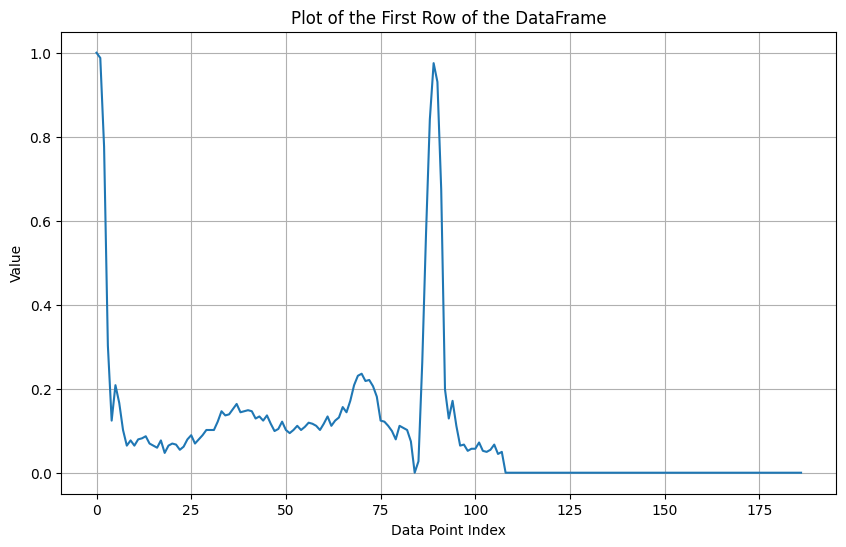

In [38]:
row_to_plot = df.iloc[1000, :-1]

plt.figure(figsize=(10, 6))
plt.plot(row_to_plot)
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Plot of the First Row of the DataFrame")
plt.grid(True)
plt.show()


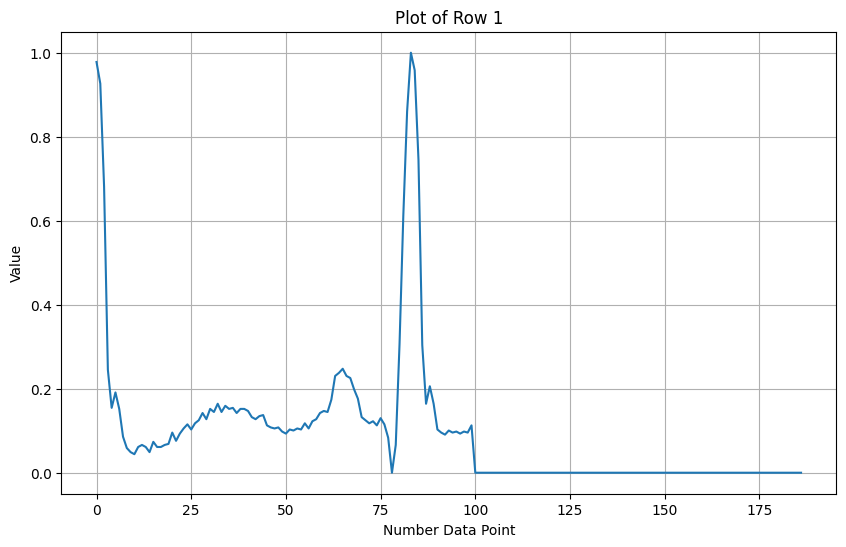

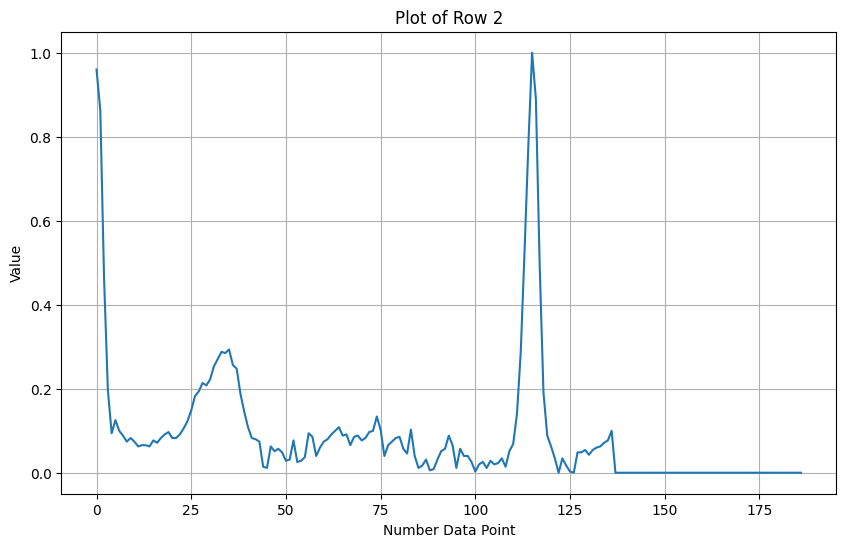

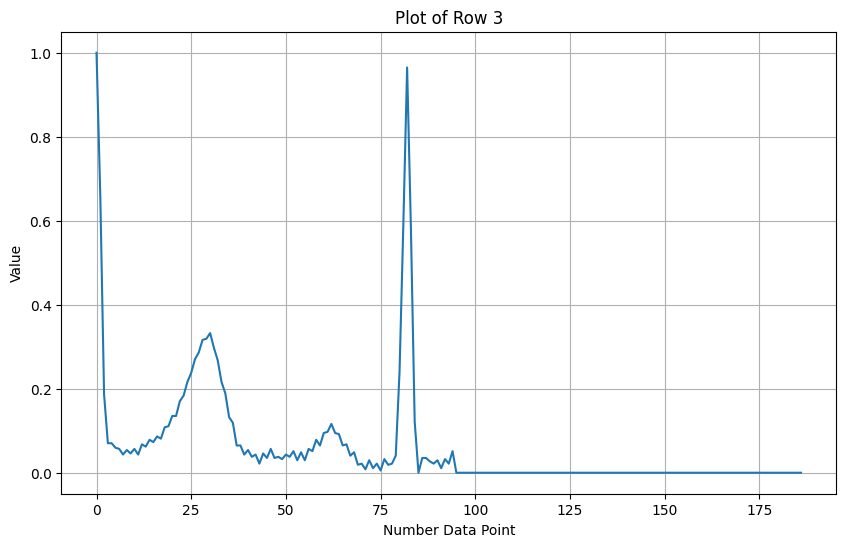

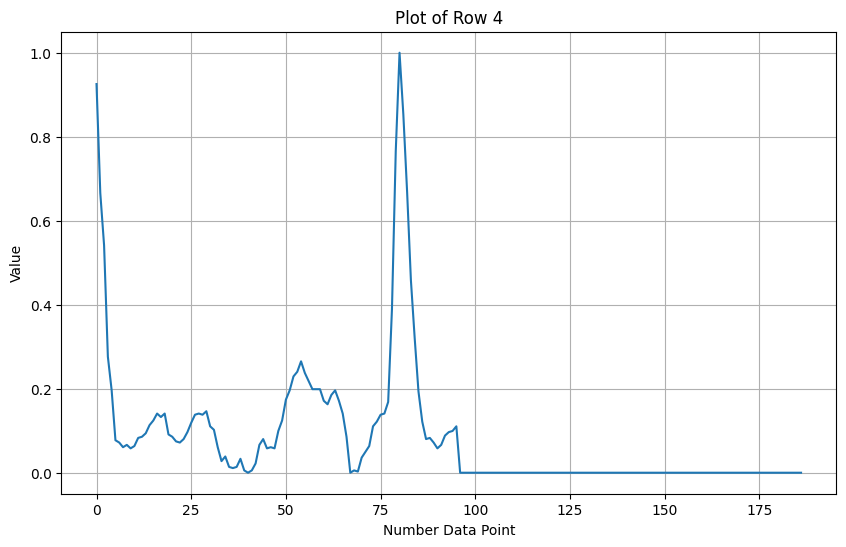

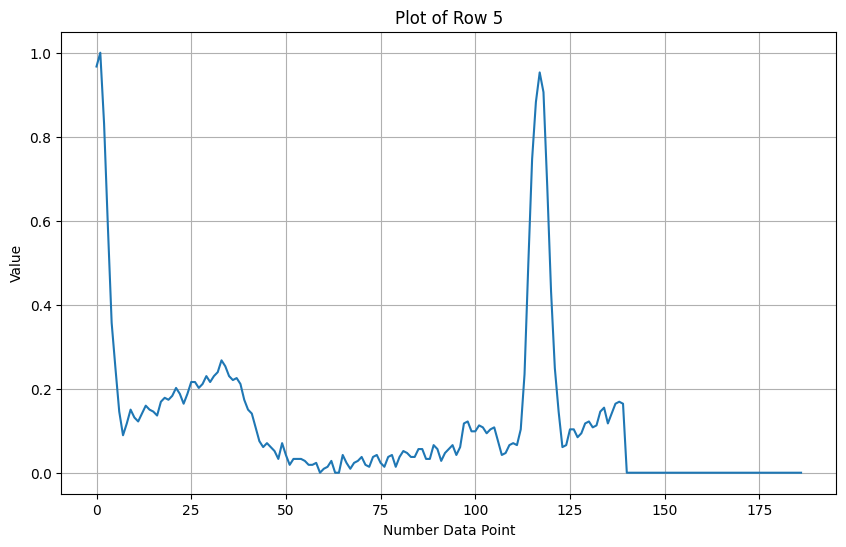

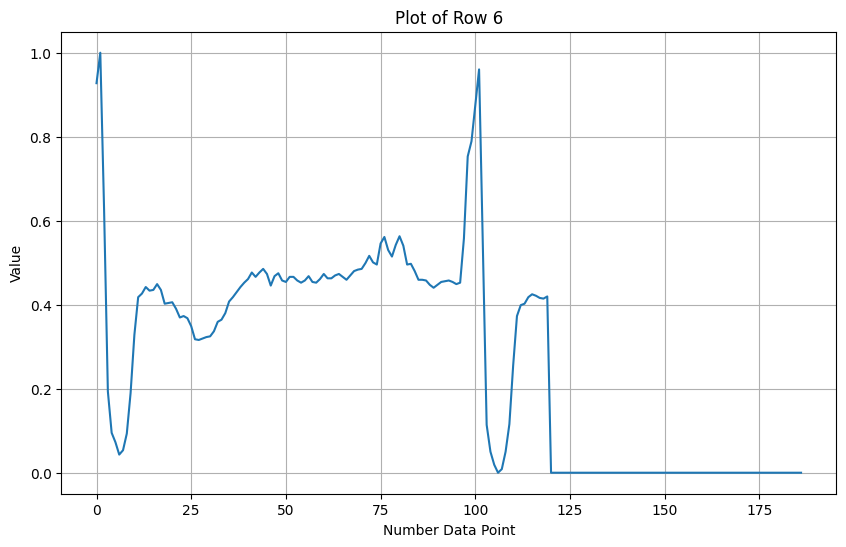

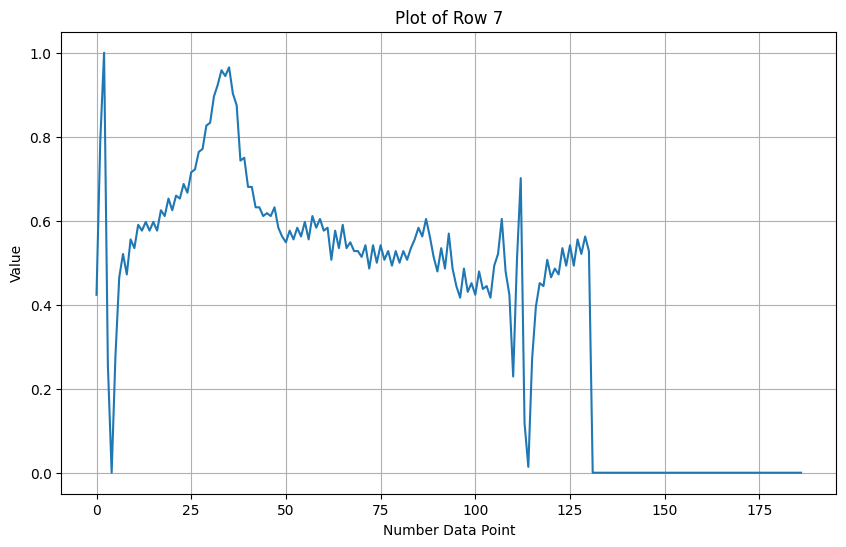

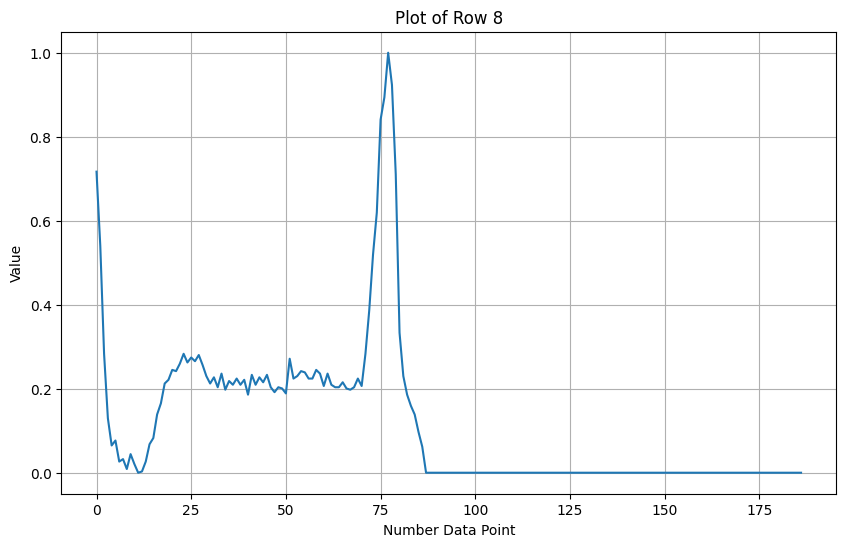

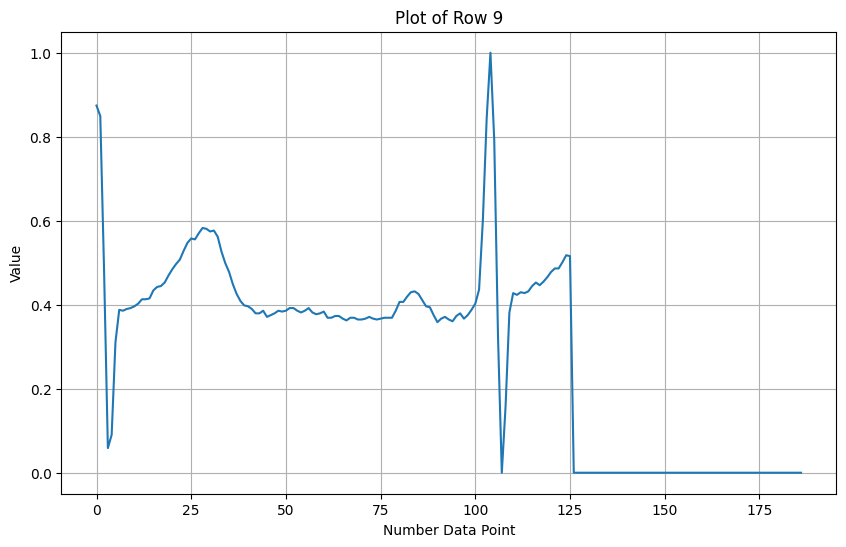

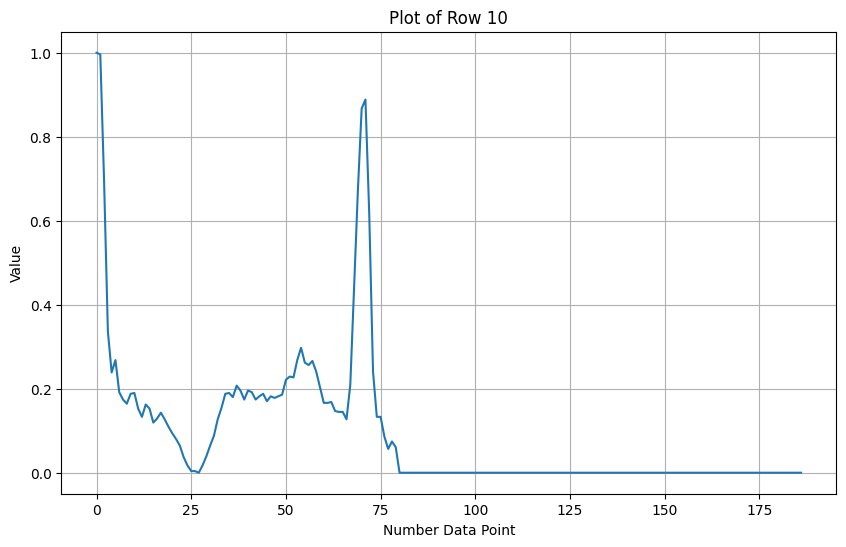

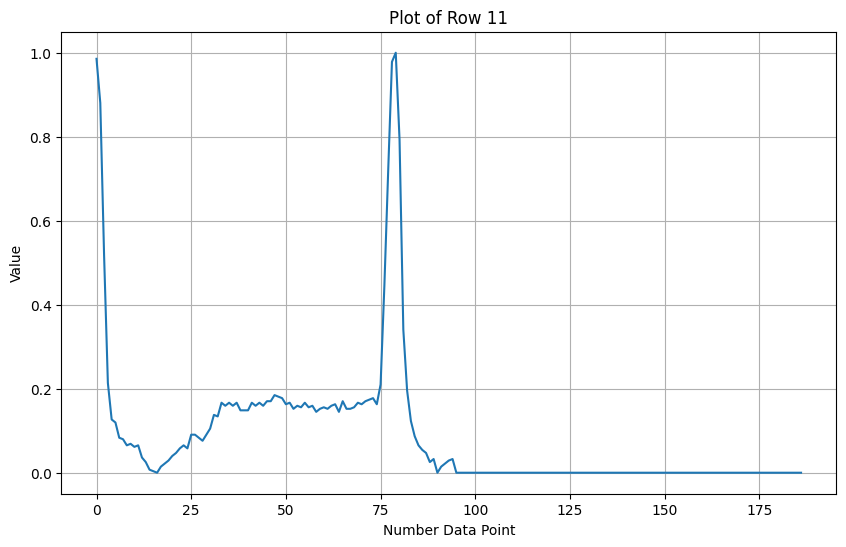

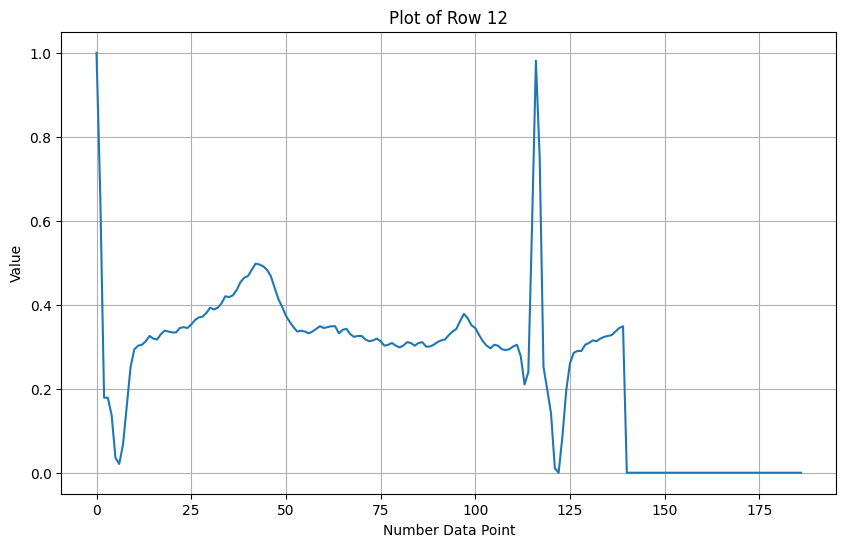

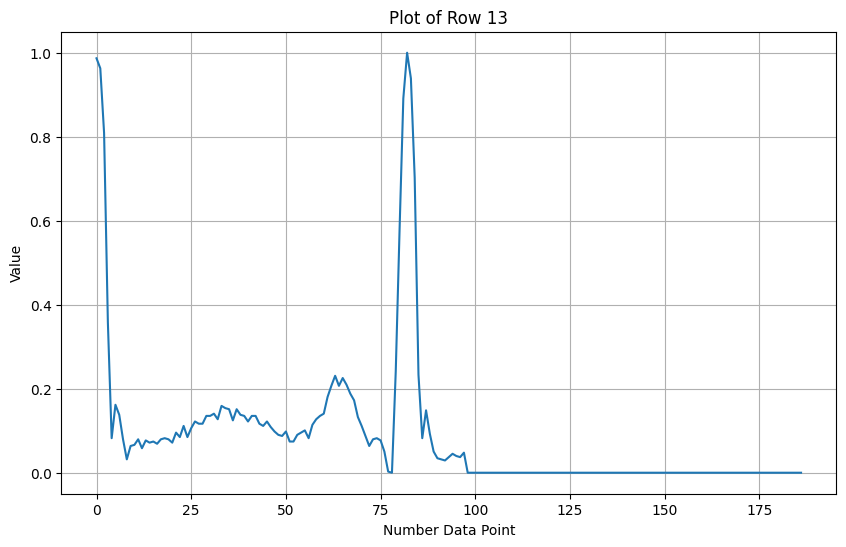

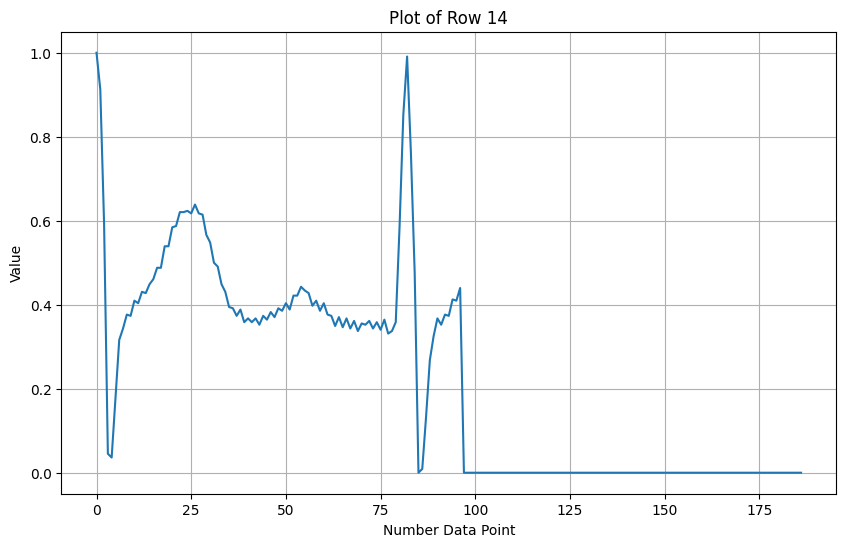

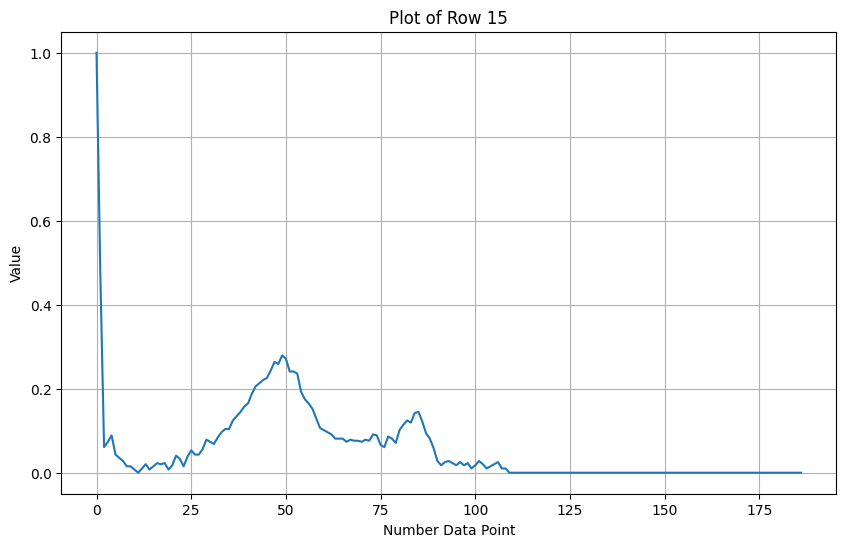

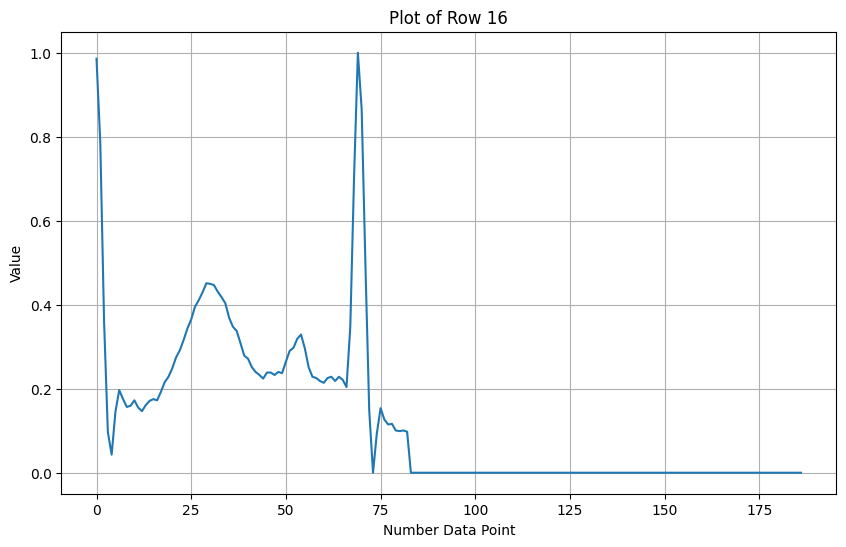

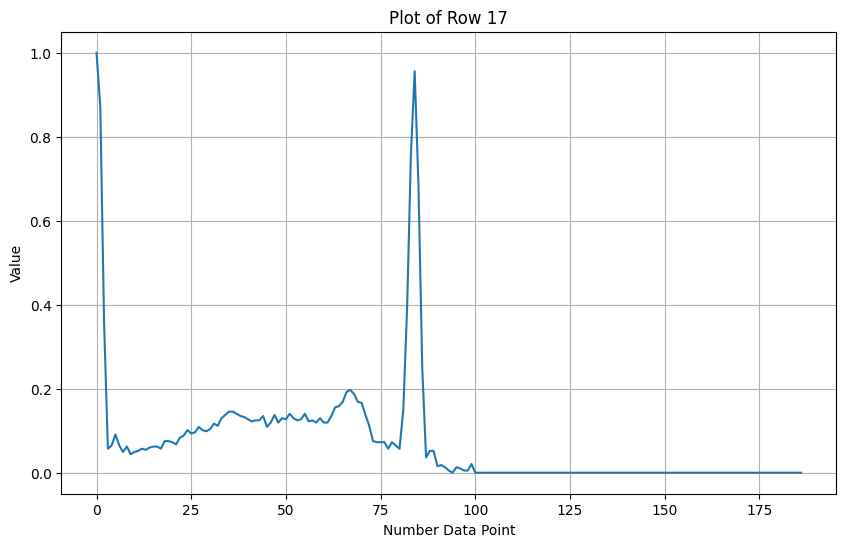

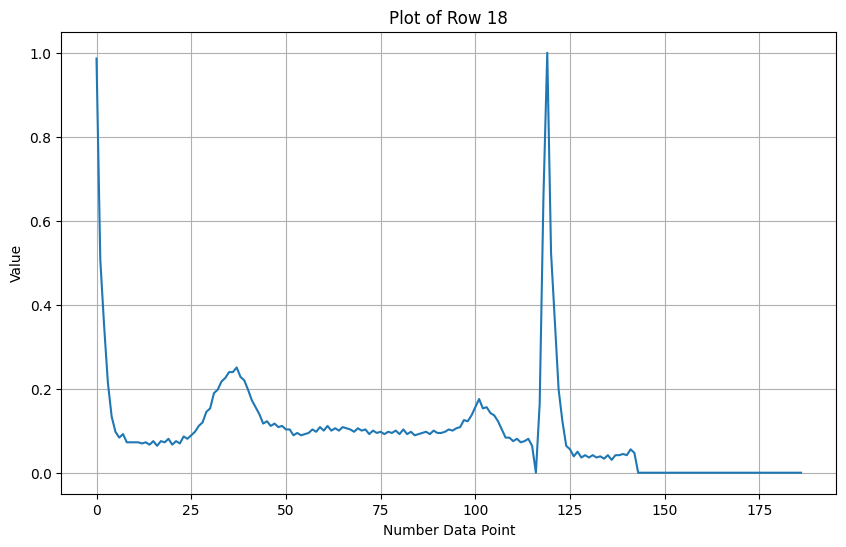

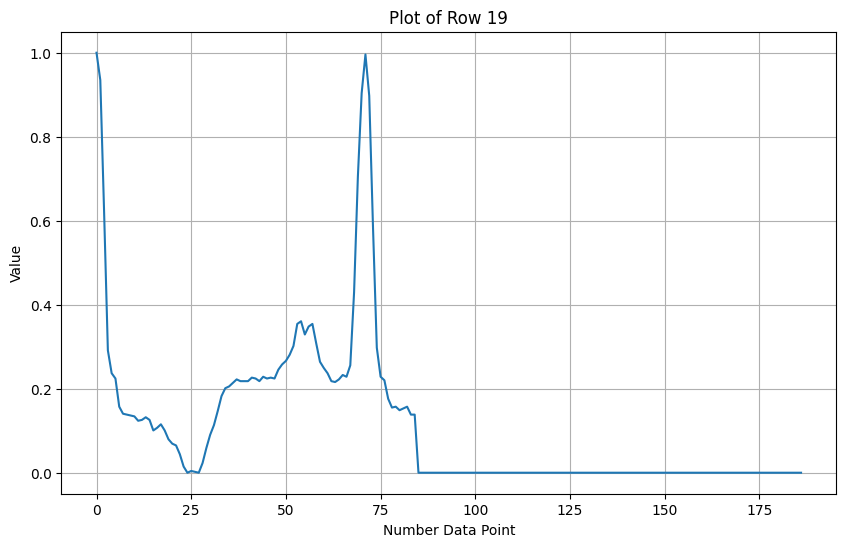

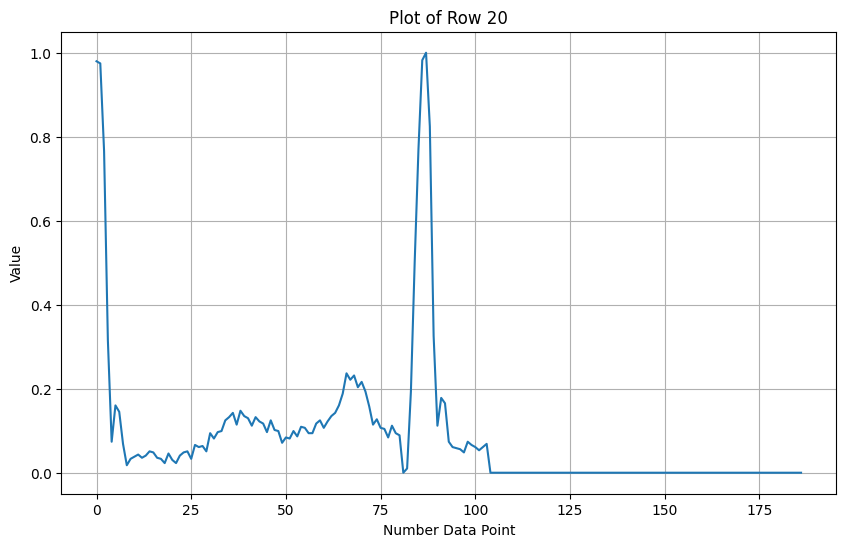

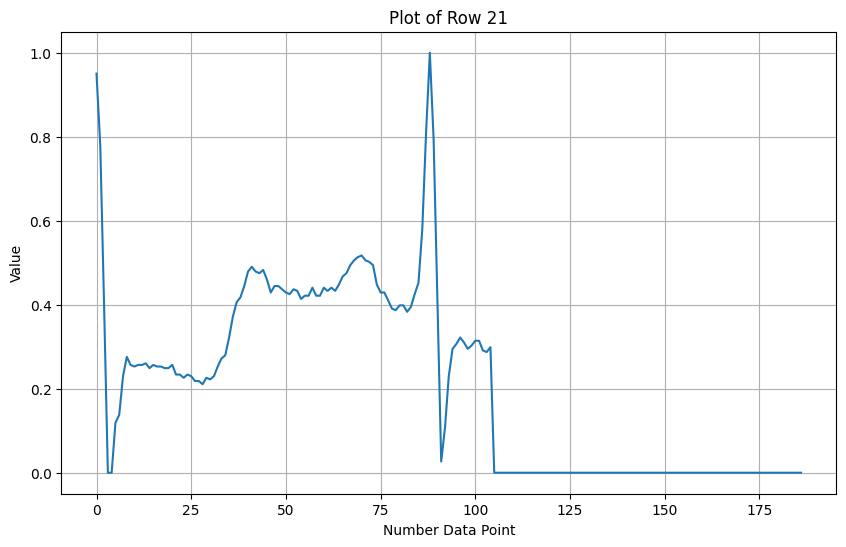

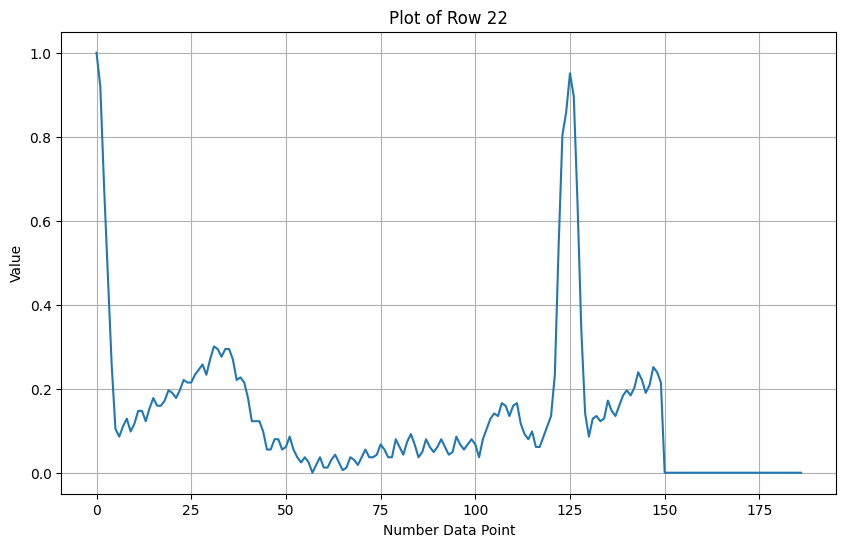

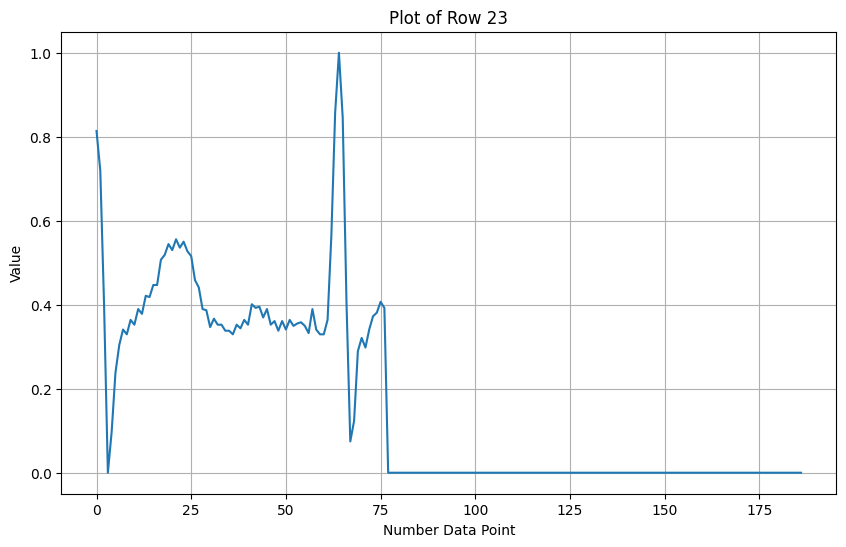

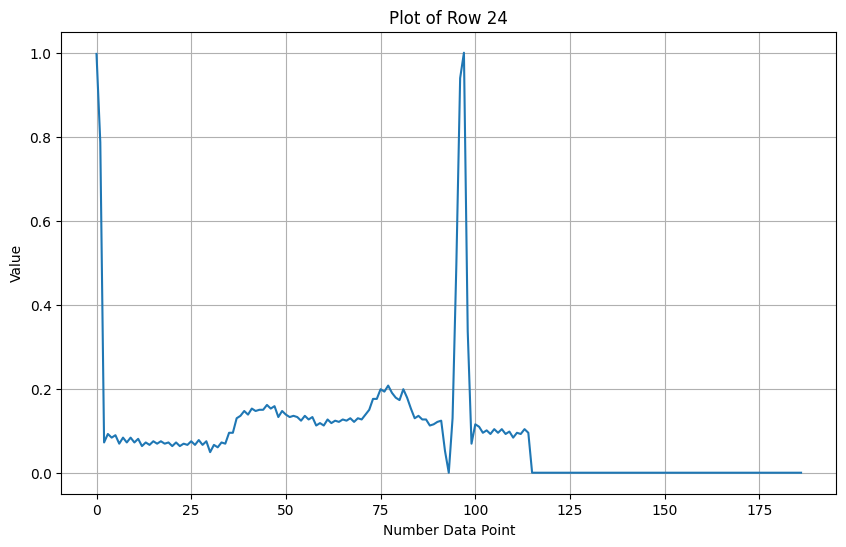

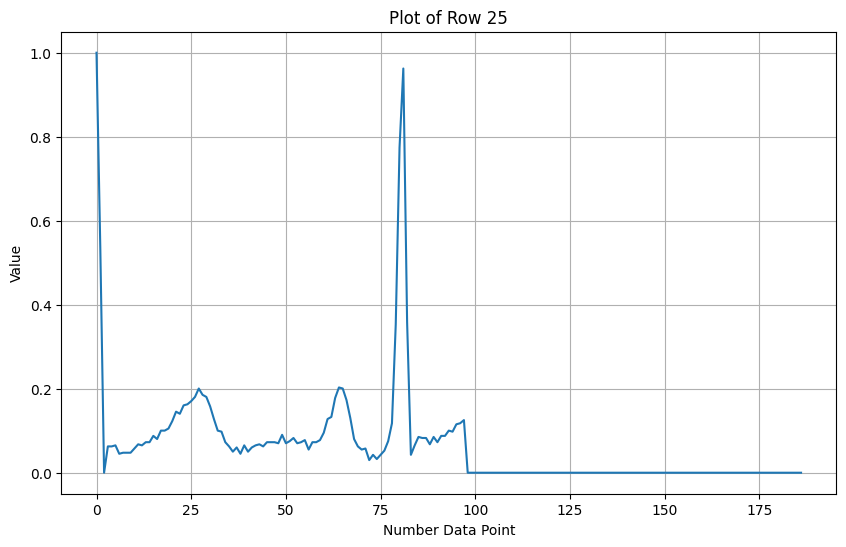

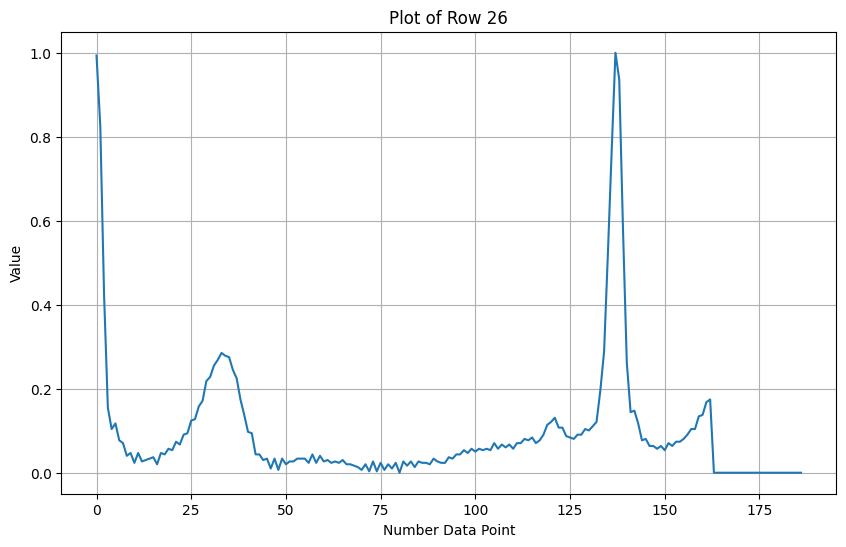

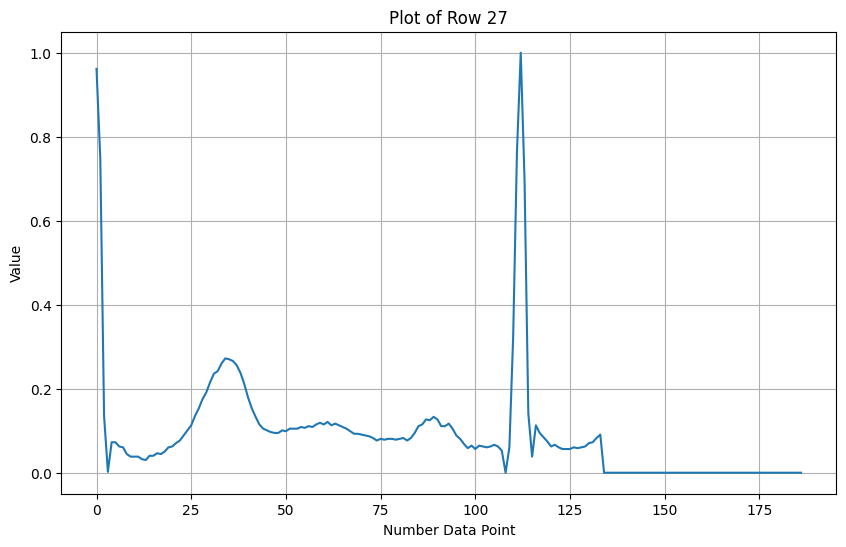

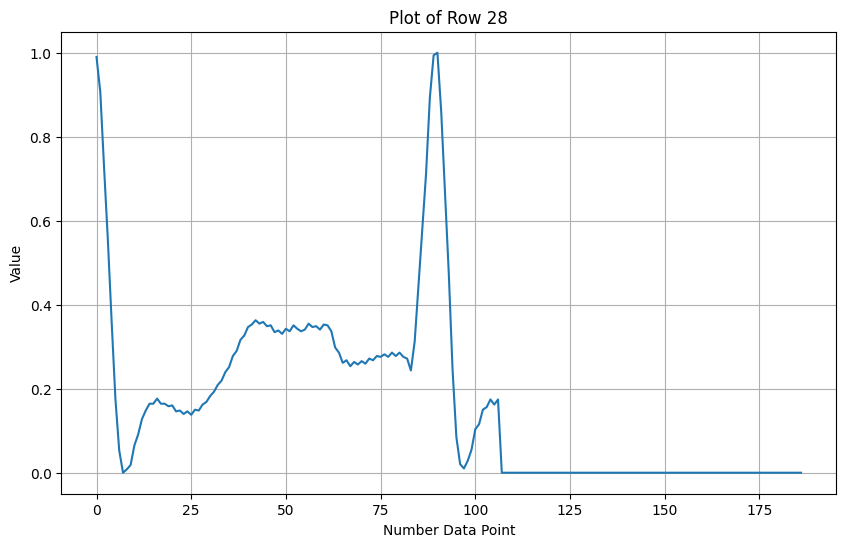

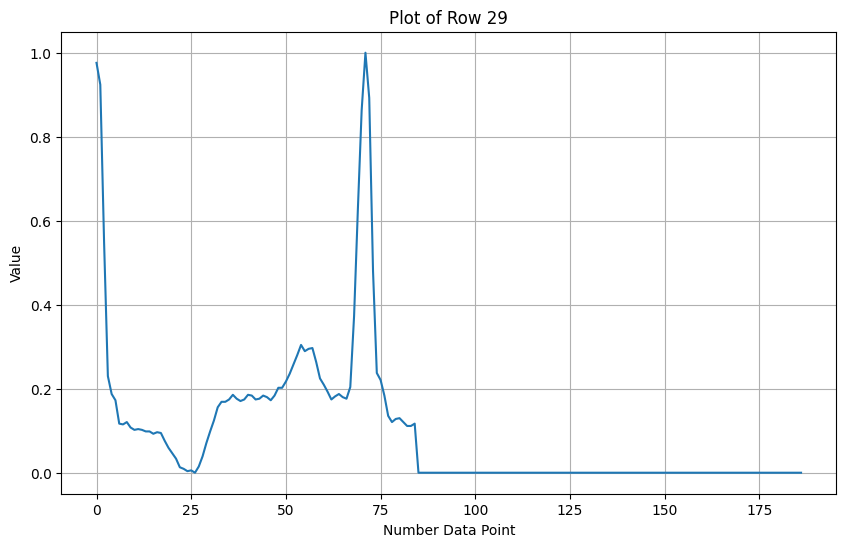

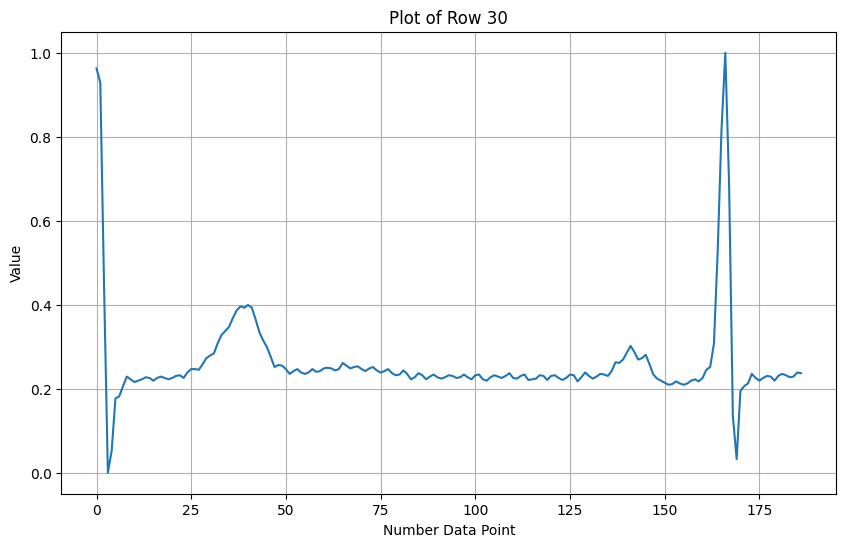

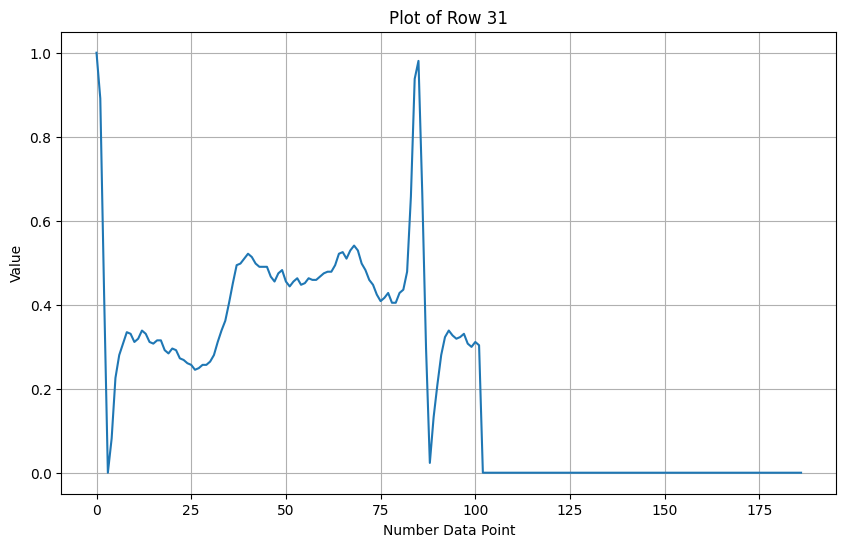

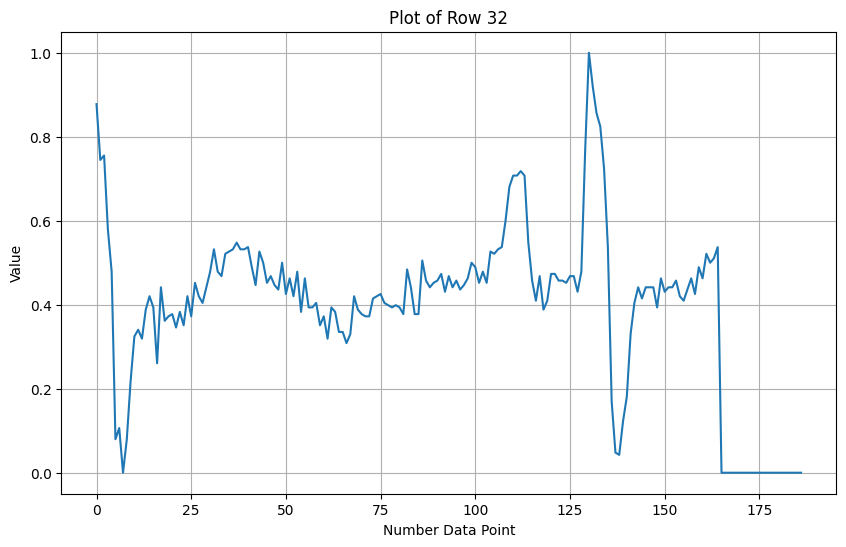

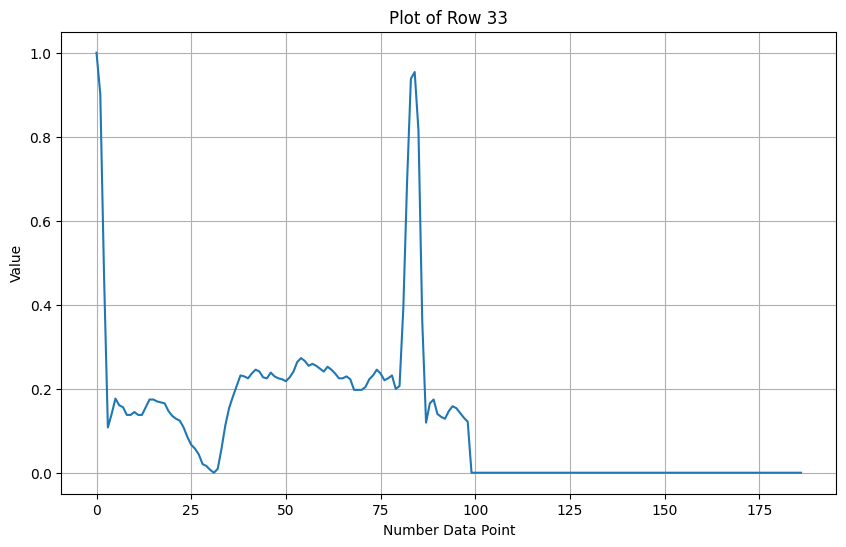

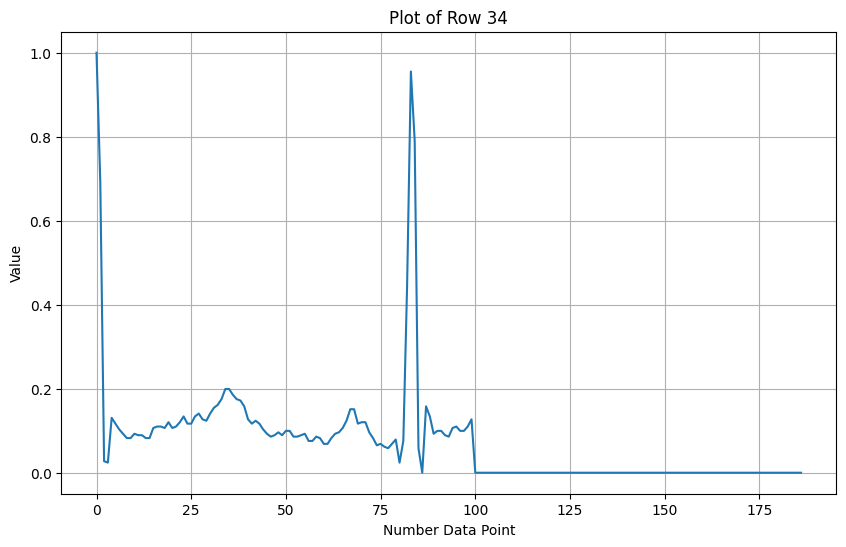

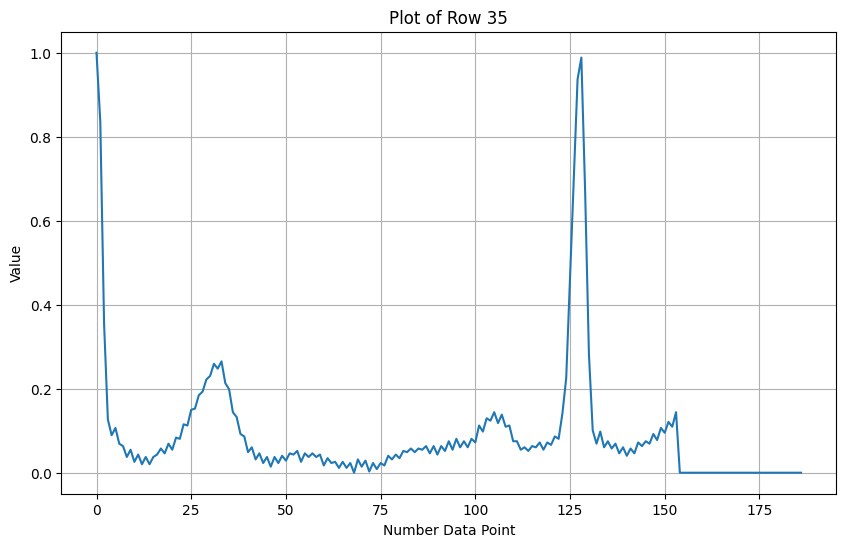

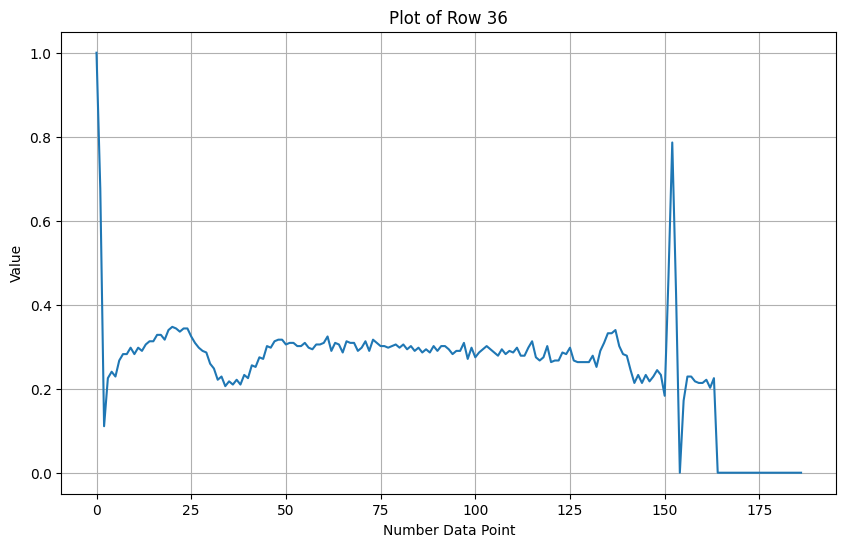

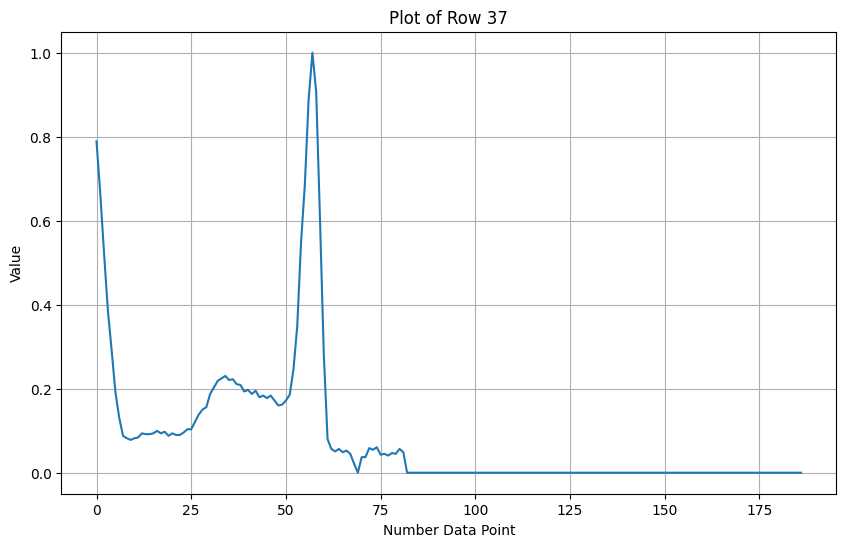

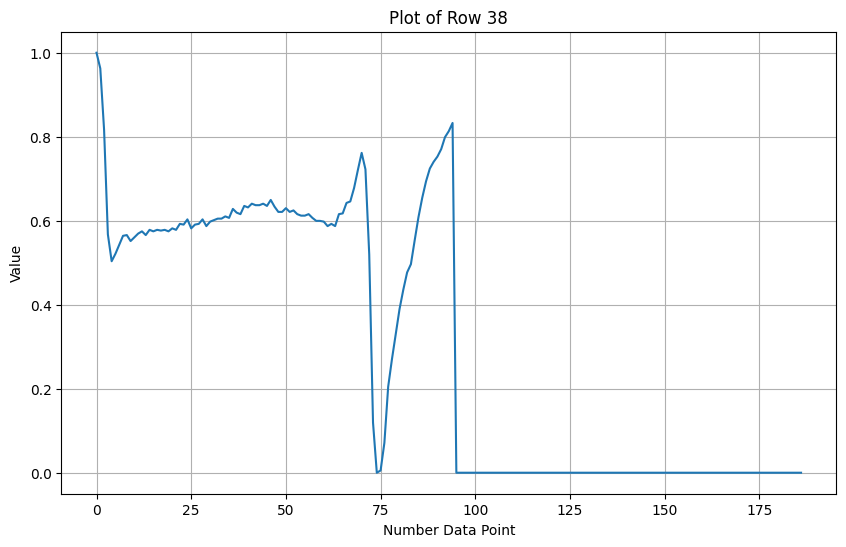

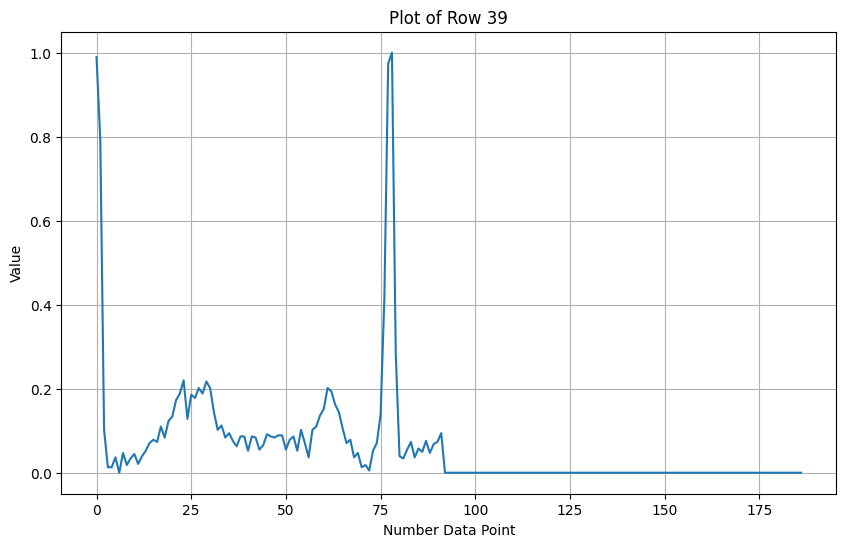

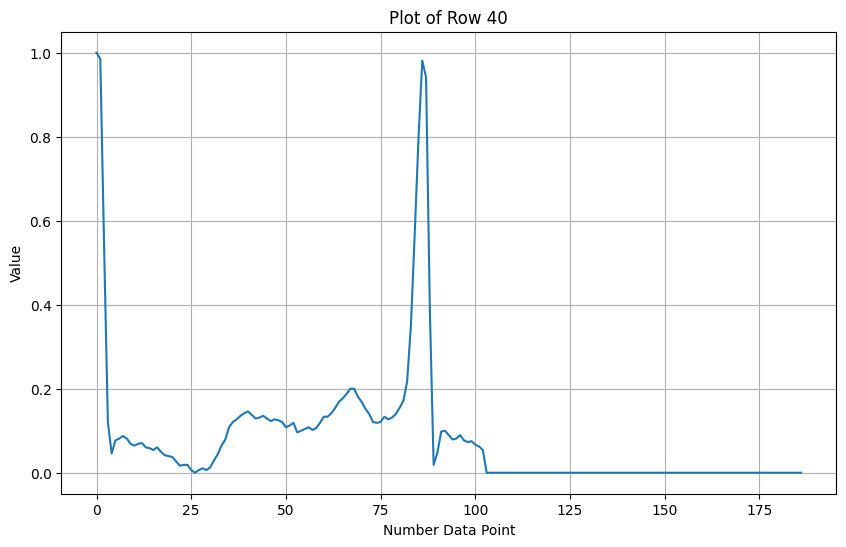

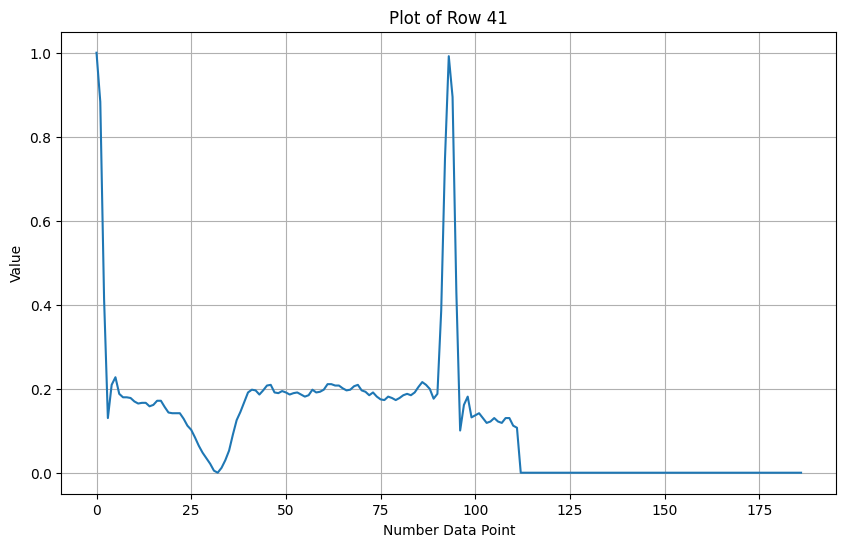

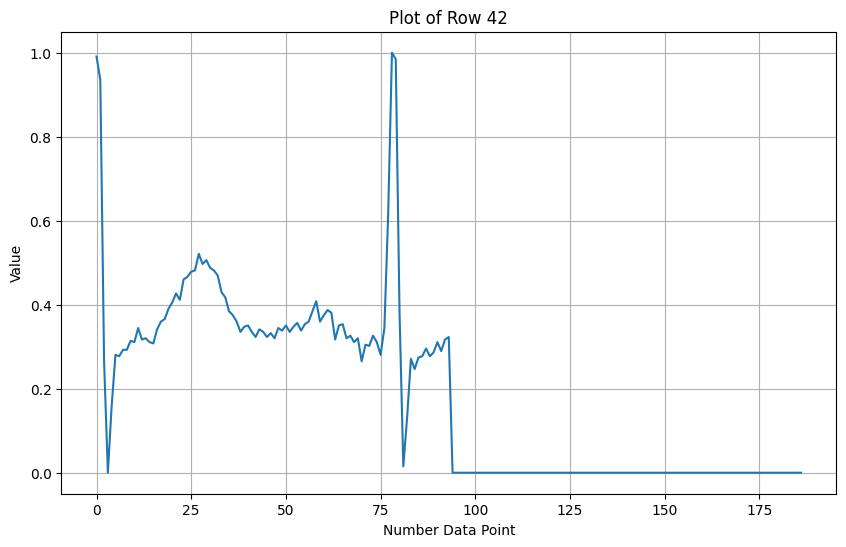

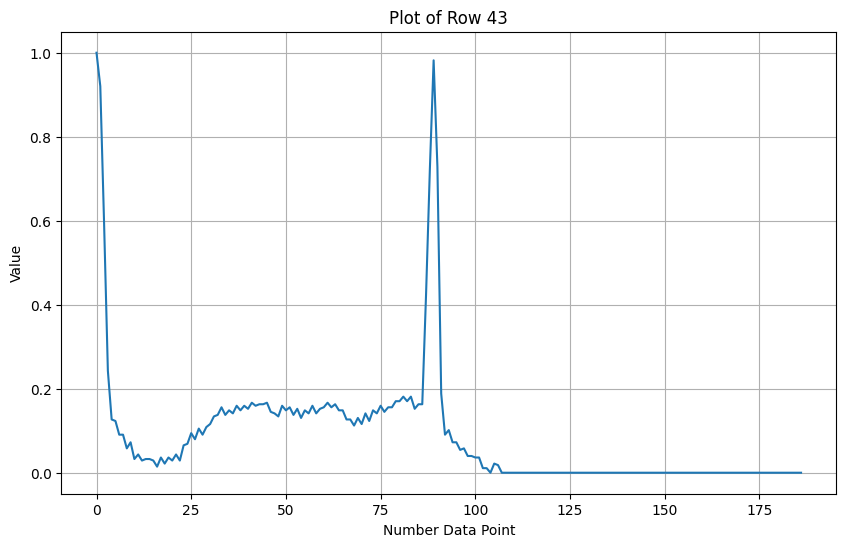

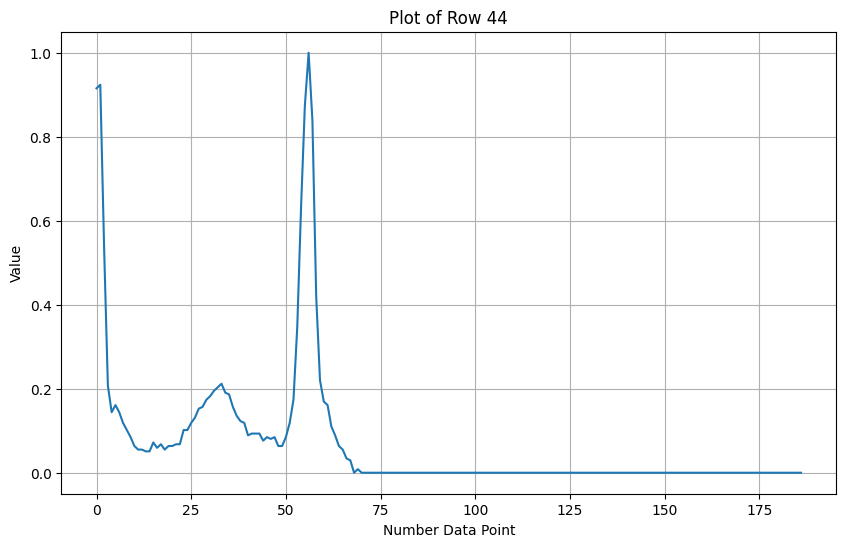

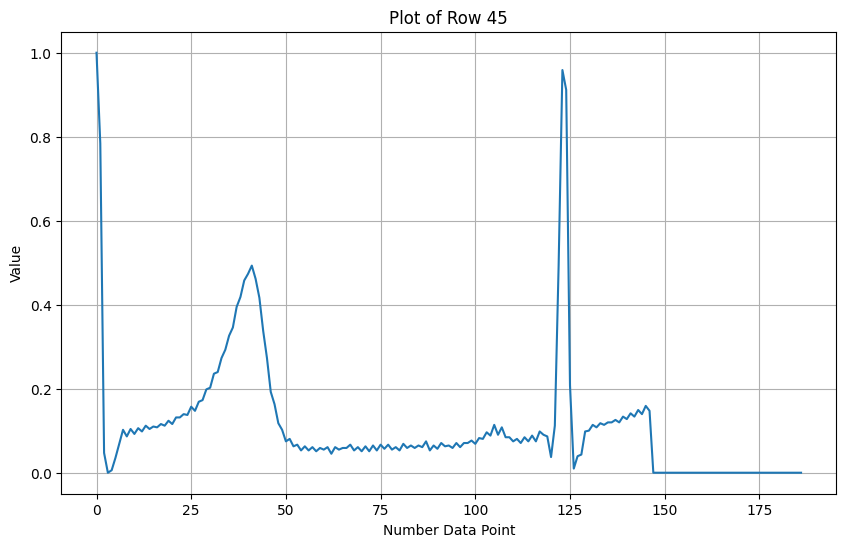

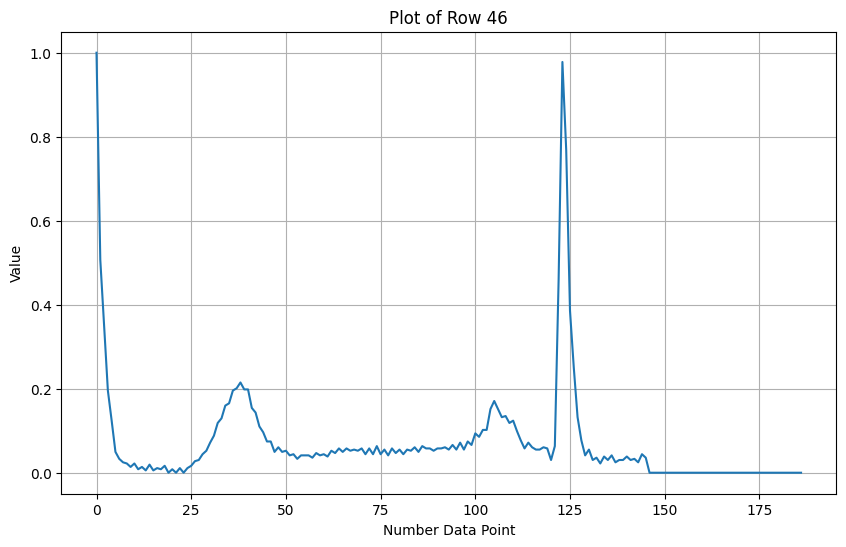

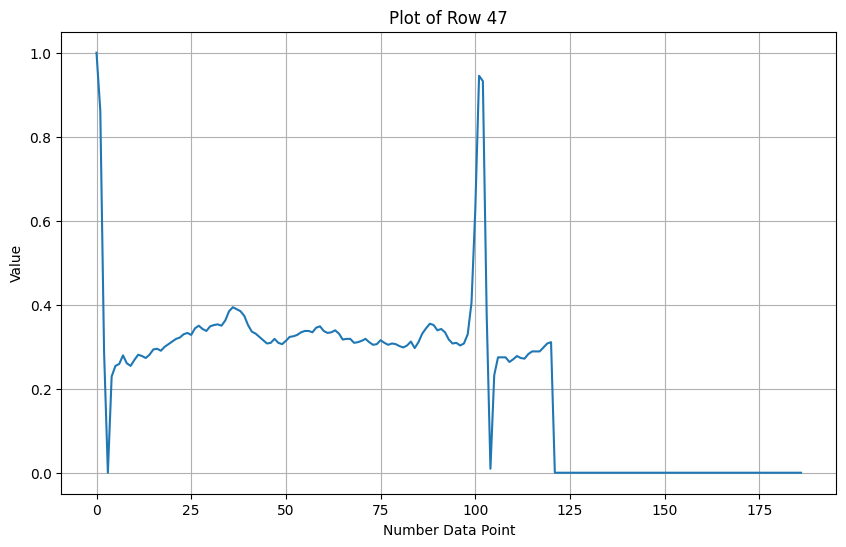

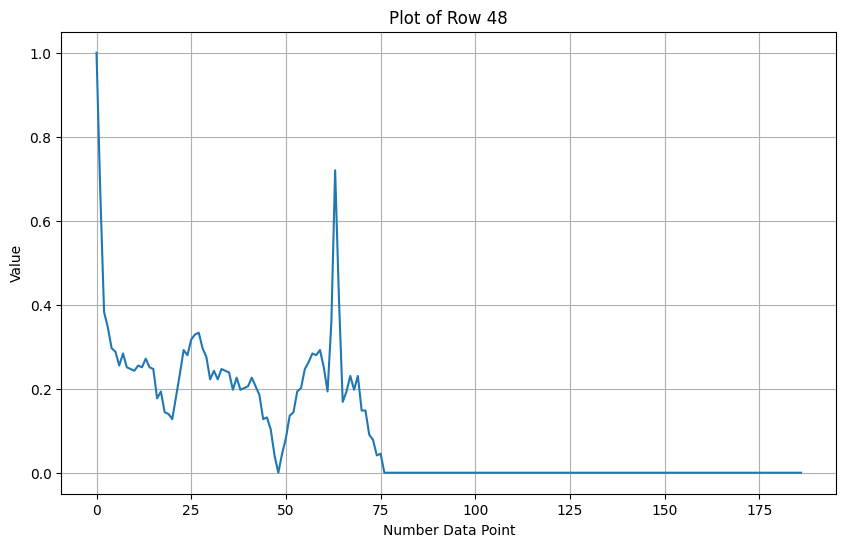

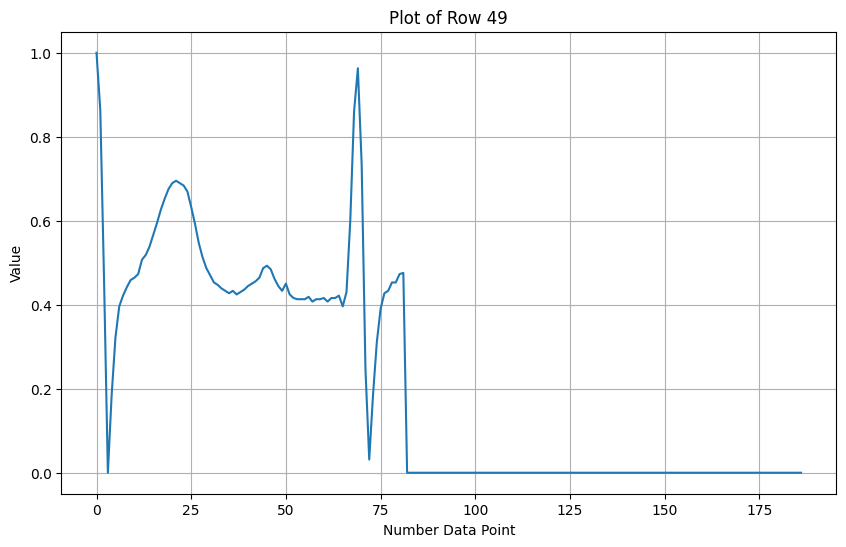

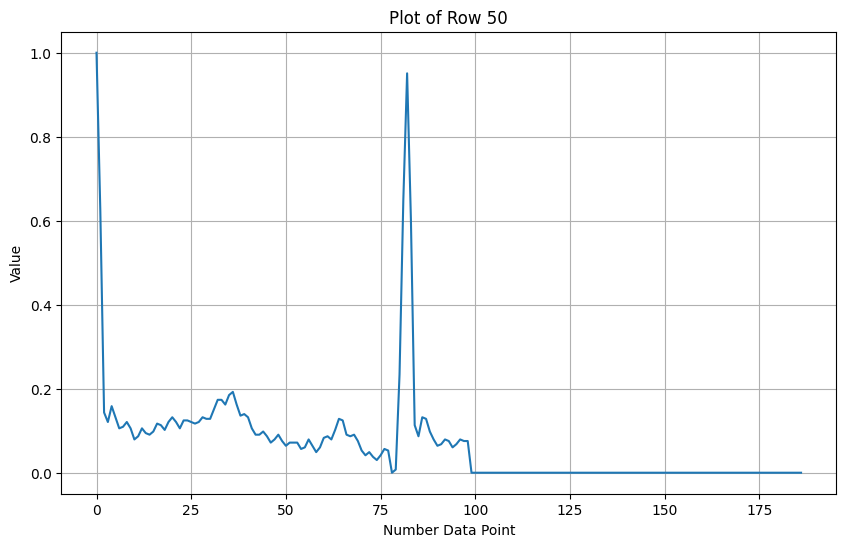

In [39]:

first_50_rows = df.head(50)

for i in range(50):
    row_to_plot = first_50_rows.iloc[i, :-1]
    plt.figure(figsize=(10, 6))
    plt.plot(row_to_plot)
    plt.xlabel("Number Data Point")
    plt.ylabel("Value")
    plt.title(f"Plot of Row {i+1}")
    plt.grid(True)
    plt.show()


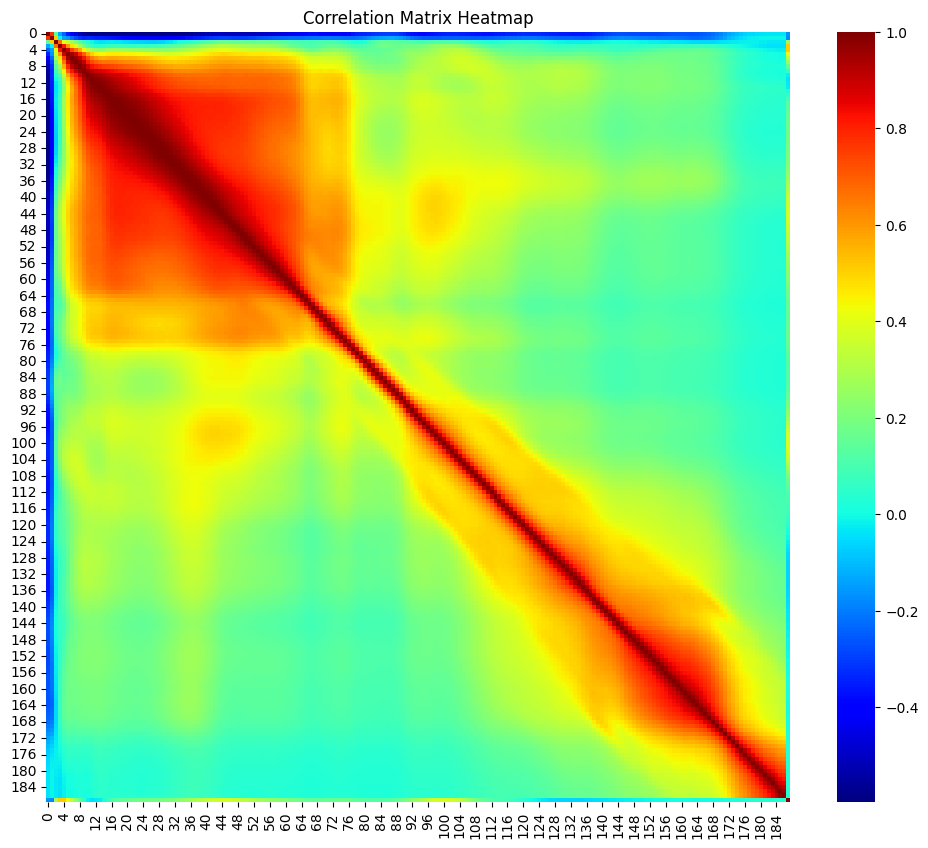

In [40]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='jet', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [42]:
X = df.drop(187, axis=1)
y = df[187]

nan_mask = y.isna()
X = X[~nan_mask]
y = y[~nan_mask]

rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_feature_selector.fit(X, y)
feature_importances = rf_feature_selector.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_20_features = feature_importance_df['Feature'][:20].tolist()
X_selected = X[top_20_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train

In [43]:
train_df = pd.read_csv('/content/mitbih_train.csv',header=None)
test_df = pd.read_csv('/content/mitbih_test.csv',header=None)

Using Random forest

In [45]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9761991777067154
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18160
         1.0       0.99      0.62      0.76       535
         2.0       0.97      0.89      0.93      1402
         3.0       0.93      0.63      0.75       158
         4.0       1.00      0.95      0.97      1635

    accuracy                           0.98     21890
   macro avg       0.97      0.82      0.88     21890
weighted avg       0.98      0.98      0.97     21890



In [51]:
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {accuracy}")

if abs(train_accuracy - accuracy) > 0.1 :
    print("Warning: Potential overfitting detected.")

Training Accuracy: 1.0
Test Accuracy: 0.9761991777067154
